#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Nora Jeanett Tønnessen 
## Norajto@uio.no

### Delivery

**Deadline**: Friday, February 28 2025, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [266]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


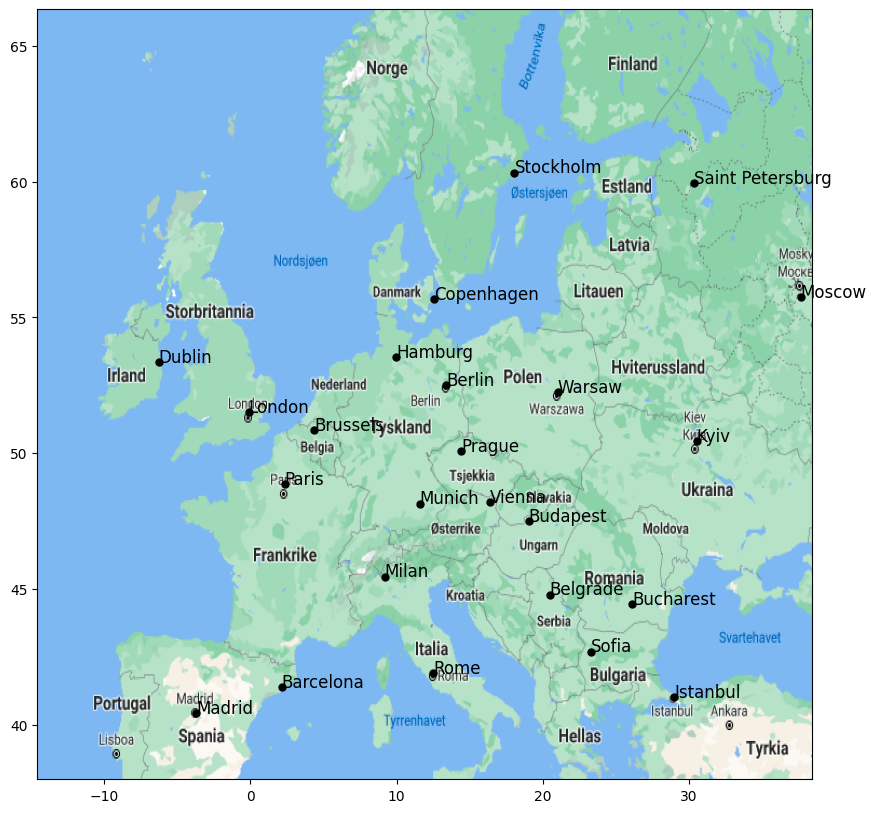

In [267]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [268]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


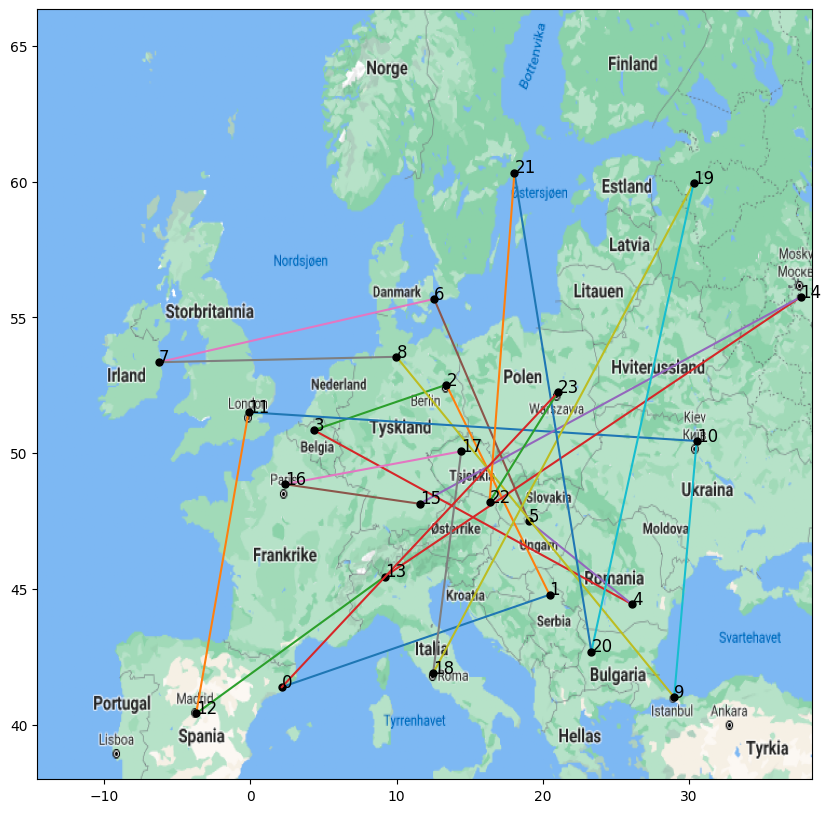

In [269]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

Best route for 6 cities: ('Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels') with a length of 5018.8099999999995


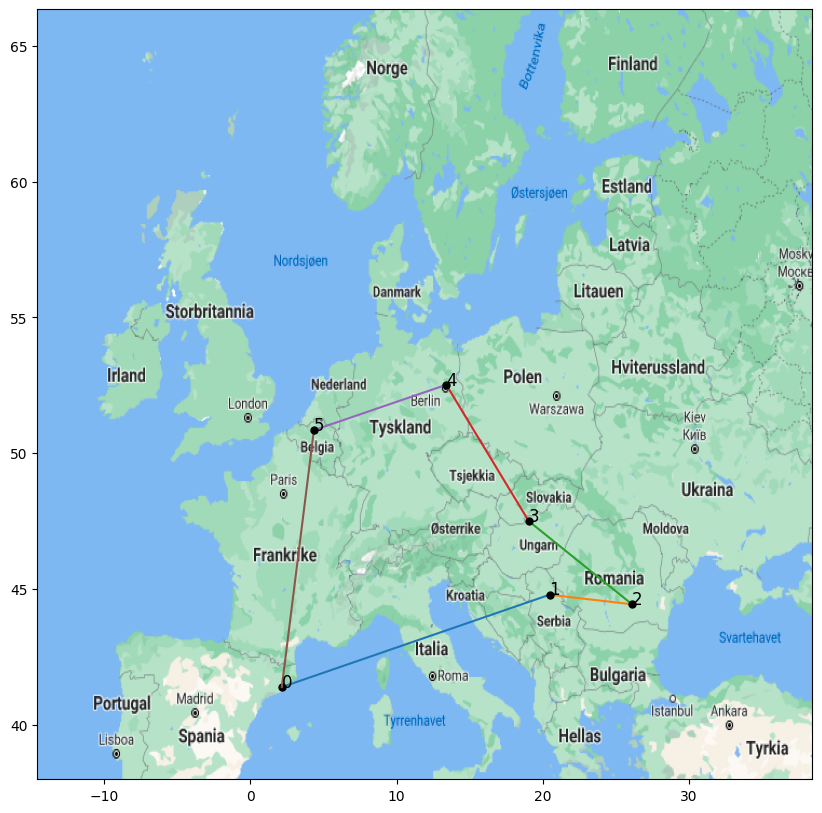

Time of calculation: 0.0030 seconds.

Best route for 10 cities: ('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin') with a length of 7486.309999999999


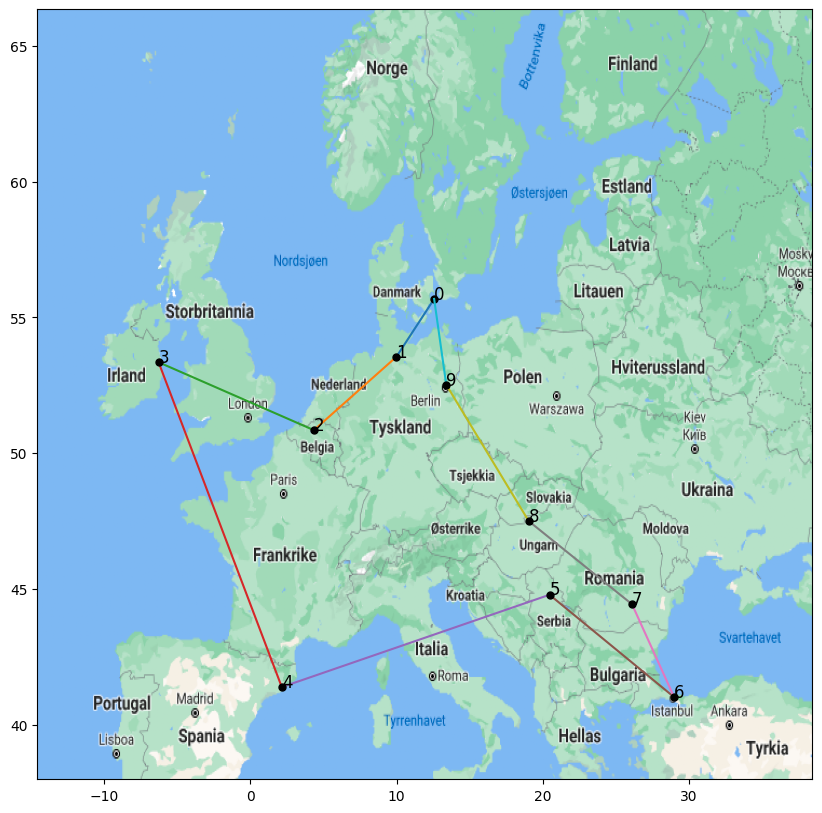

Time of calculation: 14.5498 seconds.


In [270]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

# Function to get the distance between two cities
def dist_cities(city1: str, city2: str) -> float:
    try:
        index_1 = data[0].index(city1) + 1  # Row index for city1
        index_2 = data[0].index(city2)  # Column index for city2
        return float(data[index_1][index_2])
    except ValueError:
        return float('inf')  # If city is not found, return a large number

# Function to calculate total tour distance
def tour_dist(tour: list) -> float:
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += dist_cities(tour[i], tour[i + 1])
    total_distance += dist_cities(tour[-1], tour[0])  # Close the loop
    return total_distance

# Function to find the best route using exhaustive search
def exhaustive_search(numb_city: int) -> tuple:
    cities_subset = cities[:numb_city]  # Get subset of cities
    perm_tours = list(permutations(cities_subset))  # Generate all permutations

    best_tour = perm_tours[0]
    best_distance = tour_dist(best_tour)

    for p in perm_tours:
        new_dist = tour_dist(p)
        if new_dist < best_distance:
            best_distance = new_dist
            best_tour = p

    return best_tour, best_distance  # Return best route and distance

# Function to measure execution time for different city sizes
def time_route(numb_city: int) -> float:
    start = time.time()
    _ = exhaustive_search(numb_city)
    return time.time() - start  # Fixed syntax error

# Exhaustive search for the first 6 cities
start_time = time.time()
best_route_6, min_distance_6 = exhaustive_search(6)
end_time = time.time()
execution_time_6 = end_time - start_time

# Print results for 6 cities
print(f"Best route for 6 cities: {best_route_6} with a length of {min_distance_6}")
plot_plan(best_route_6)
print(f"Time of calculation: {execution_time_6:.4f} seconds.")

# Exhaustive search for the first 10 cities
start_time = time.time()
best_route_10, min_distance_10 = exhaustive_search(10)
end_time = time.time()
execution_time_10 = end_time - start_time

# Print results for 10 cities
print(f"\nBest route for 10 cities: {best_route_10} with a length of {min_distance_10}")
plot_plan(best_route_10)
print(f"Time of calculation: {execution_time_10:.4f} seconds.")

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?


Estimated exhaustive search time for 24 cities:
~ 2.04e+11 seconds (~ 6463.18 years)


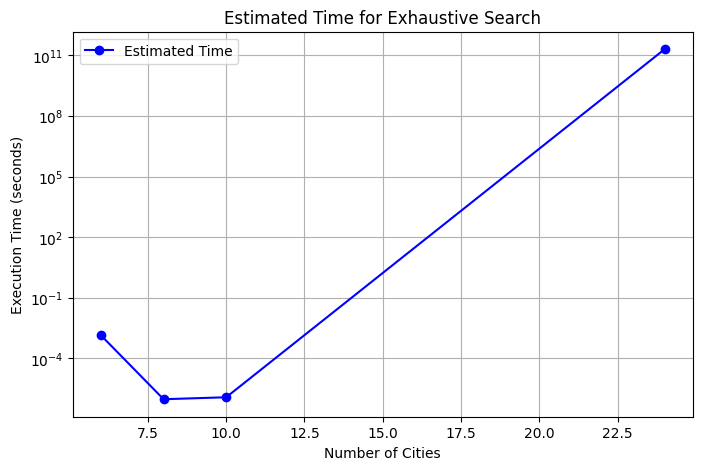

In [ ]:
# You can se over that i have answared the question and you can test them. 
#


# Measure execution time for smaller problem sizes
def measure_exhaustive_time(numb_city):
    start_time = time.time()
    _ = math.factorial(numb_city)  # Simulate permutations without actual computation
    end_time = time.time()
    return end_time - start_time  # Return time in seconds

# Measure for smaller cases
execution_times = {}
for num_cities in [6, 8, 10]:
    execution_times[num_cities] = measure_exhaustive_time(num_cities)

# Approximate time for 24 cities using factorial growth
factorial_growth = execution_times[10] / math.factorial(10)  # Time per factorial step
estimated_time_24 = factorial_growth * math.factorial(24)  # Scale up to 24 cities

# Print estimated time
print("\nEstimated exhaustive search time for 24 cities:")
print(f"~ {estimated_time_24:.2e} seconds (~ {estimated_time_24 / (60 * 60 * 24 * 365):.2f} years)")

# Plot time complexity growth
x_values = list(execution_times.keys()) + [24]
y_values = [execution_times[n] for n in execution_times.keys()] + [estimated_time_24]

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='blue', label="Estimated Time")
plt.xlabel("Number of Cities")
plt.ylabel("Execution Time (seconds)")
plt.yscale("log")  # Log scale for readability
plt.title("Estimated Time for Exhaustive Search")
plt.legend()
plt.grid()
plt.show()




# I am wondering if i did this correctly

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 


Resultater med 10 byer
Metric         Value
--------------------------------------------------
Best           7486.31
Worst          8460.73
Mean           7677.28
Std Dev        309.25
--------------------------------------------------
Best Route:
Dublin ➝ Brussels ➝ Hamburg ➝ Copenhagen ➝ Berlin ➝ Budapest ➝ Budapest ➝ Bucharest ➝ Istanbul ➝ Belgrade ➝ Barcelona


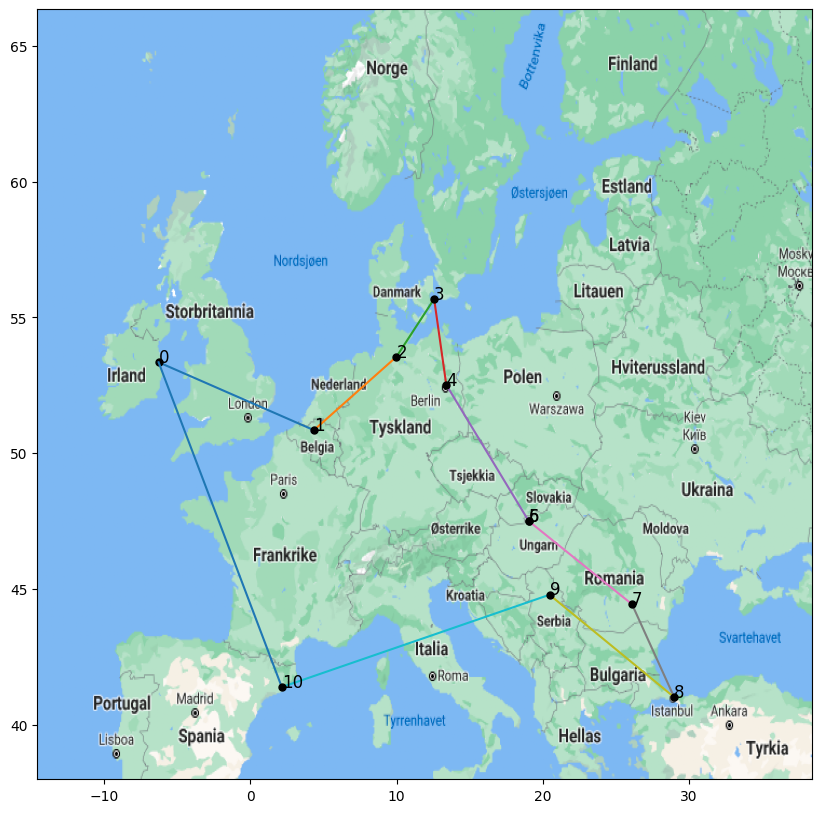


Resultater med 24 byer
Metric         Value
--------------------------------------------------
Best           15742.50
Worst          19167.83
Mean           17585.41
Std Dev        1149.01
--------------------------------------------------
Best Route:
Istanbul ➝ Bucharest ➝ Kyiv ➝ Moscow ➝ Saint Petersburg ➝ Warsaw ➝ Stockholm ➝ Prague ➝ Vienna ➝ Budapest ➝ Munich ➝ Berlin ➝ Hamburg ➝ Paris ➝ Dublin ➝ London ➝ Copenhagen ➝ Brussels ➝ Barcelona ➝ Barcelona ➝ Madrid ➝ Milan ➝ Rome ➝ Belgrade ➝ Sofia


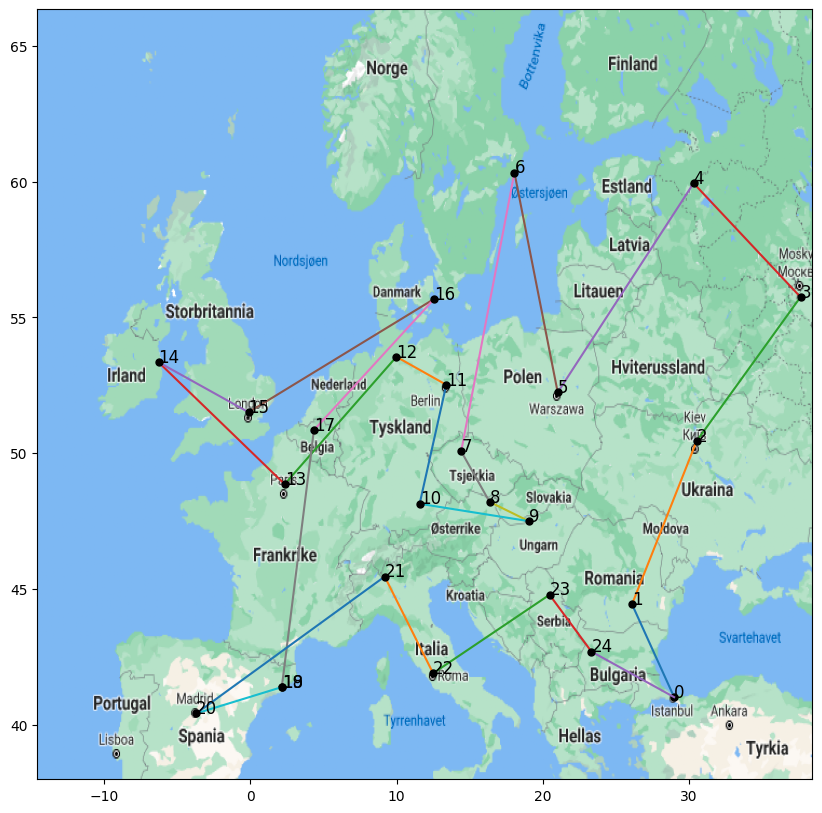

In [333]:
import random
import statistics

# Swap two random cities in the route
def swap_cities(route):
    new_route = route[:]
    city1, city2 = random.sample(range(len(new_route)), 2)
    new_route[city1], new_route[city2] = new_route[city2], new_route[city1]
    return new_route

# Reverse a segment of the route 
def reverse_segment(route):
    new_route = route[:]
    city1, city2 = sorted(random.sample(range(len(new_route)), 2))  # Ensure city1 < city2
    new_route[city1:city2] = reversed(new_route[city1:city2])
    return new_route

# Hill Climbing with adaptive improvements
def hill_climbing(initial_route, max_iterations, temp=1.0, cooling_rate=0.99):
    current_route = initial_route[:]
    current_distance = tour_dist(current_route)
    
    best_route = current_route[:]
    best_distance = current_distance

    for iteration in range(max_iterations):
        # Try both swap and 2-opt to generate a better solution
        new_route = swap_cities(current_route) if random.random() < 0.5 else reverse_segment(current_route)
        new_distance = tour_dist(new_route)

        # Accept new route if it's better OR probabilistically allow worse moves to escape local optima
        if new_distance < current_distance or random.random() < temp:
            current_route = new_route
            current_distance = new_distance

        # Track best solution found so far
        if new_distance < best_distance:
            best_route = new_route[:]
            best_distance = new_distance

        # Decrease temperature for simulated annealing effect
        temp *= cooling_rate  

    return best_route, best_distance

# Run multiple hill climbing runs for statistical analysis
def run_hill_climbing(num_runs, number_of_cities, city_coords):
    best_distance = float('inf')
    best_route = []
    worst_distance = 0
    worst_route = []
    all_distances = []

    for _ in range(num_runs):
        initial_route = random.sample(list(city_coords.keys())[:number_of_cities], k=number_of_cities)
        initial_route.append(initial_route[0])  # Complete the loop

        # Run hill climbing
        route, distance = hill_climbing(initial_route, max_iterations=500)  # Increased iterations

        # Store all distances
        all_distances.append(distance)

        # Update best and worst routes
        if distance < best_distance:
            best_distance = distance
            best_route = route

        if distance > worst_distance:
            worst_distance = distance
            worst_route = route

    # Compute statistics
    mean_distance = statistics.mean(all_distances)
    std_distance = statistics.stdev(all_distances) if len(all_distances) > 1 else 0
    return best_distance, worst_distance, mean_distance, std_distance, best_route

# Print results in a formatted way including cities in the best route
def print_results(title, best, worst, mean, std_dev, route):
    print(f"\n{title}")
    print("=" * 50)
    print(f"{'Metric':<15}{'Value'}")
    print("-" * 50)
    print(f"{'Best':<15}{best:.2f}")
    print(f"{'Worst':<15}{worst:.2f}")
    print(f"{'Mean':<15}{mean:.2f}")
    print(f"{'Std Dev':<15}{std_dev:.2f}")
    print("-" * 50)
    print(f"Best Route:")
    print(" ➝ ".join(route))  # Print route as an arrow-separated path
    print("=" * 50)

# Run tests
if __name__ == "__main__": 
    num_runs = 20

    # Run with first 10 cities
    best_distance_10, worst_distance_10, mean_distance_10, std_distance_10, best_route_10 = run_hill_climbing(num_runs, 10, city_coords)

    # Print formatted results
    print_results("Resultater med 10 byer", best_distance_10, worst_distance_10, mean_distance_10, std_distance_10, best_route_10)
    plot_plan(best_route_10)

    # Run with all 24 cities
    best_distance_24, worst_distance_24, mean_distance_24, std_distance_24, best_route_24 = run_hill_climbing(num_runs, 24, city_coords)

    # Print formatted results
    print_results("Resultater med 24 byer", best_distance_24, worst_distance_24, mean_distance_24, std_distance_24, best_route_24)
    plot_plan(best_route_24)


In [ ]:
#Print ble veldig undødvendig heavy, prøvde å importere noe som ikke gikk helt min vei, litt liten tid. 

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [309]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# Ensure `dis` or `city_coords` is used properly
def makePopulation(n, size):
    population = []
    
    if 'dis' in globals():
        names = list(dis.keys())[:n]  
    else:
        names = list(city_coords.keys())[:n]

    for _ in range(size):
        individual = np.random.permutation(names).tolist()
        population.append(individual)

    return population

def evaluate_fitness(population):
    return [(tour, tour_dist(tour)) for tour in population]

def tour_dist(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += dist_cities(route[i], route[i + 1])
    total_distance += dist_cities(route[-1], route[0])  # Return to start
    return total_distance

# Tournament Selection
def parentSelection(population_fitness, selection_size):
    sorted_population = sorted(population_fitness, key=lambda x: x[1])  # Sort by best fitness
    return [sorted_population[i][0] for i in range(selection_size)]  # Take top solutions

# PMX Crossover
def crossover(parent1, parent2):
    size = len(parent1)
    child1, child2 = [None] * size, [None] * size
    
    start, end = sorted(random.sample(range(size), 2))
    child1[start:end] = parent1[start:end]
    child2[start:end] = parent2[start:end]

    def fill_child(child, parent):
        for i in range(size):
            if child[i] is None:
                for gene in parent:
                    if gene not in child:
                        child[i] = gene
                        break
        return child

    return fill_child(child1, parent2), fill_child(child2, parent1)

# Mutation - Swap two cities
def swap_mutation(tour):
    if random.random() < 0.5:  # 50% chance to swap two cities
        city1, city2 = np.random.choice(len(tour), 2, replace=False)
        tour[city1], tour[city2] = tour[city2], tour[city1]
    else:  # 50% chance to reverse a segment
        start, end = sorted(random.sample(range(len(tour)), 2))
        tour[start:end] = reversed(tour[start:end])
    return tour

# Elitism (Survivor Selection)
def survivorSelection(population_fitness, size):
    return sorted(population_fitness, key=lambda x: x[1])[:size]




Running Genetic Algorithm with Different Population Sizes

Population Size: 10
Average execution time: 0.0182 sec
Best route for 24 cities: 15611.260000000002
Worst: 20384.510000000002, Mean: 17776.2435, Std Dev: 1190.4465397164001


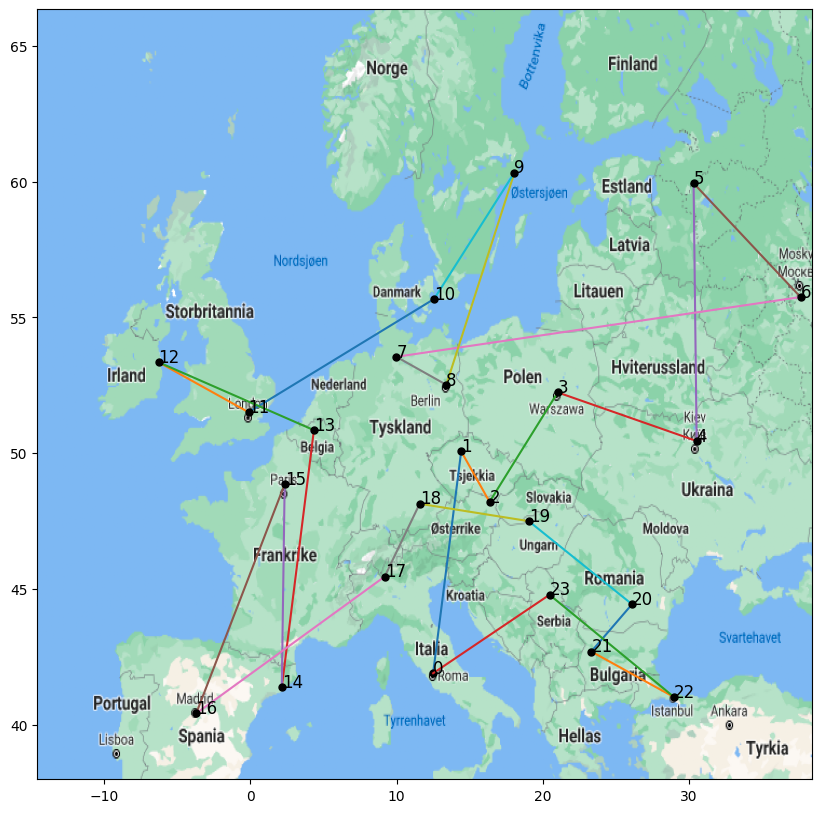


Population Size: 50
Average execution time: 0.0981 sec
Best route for 24 cities: 13367.1
Worst: 15601.86, Mean: 14242.807499999999, Std Dev: 646.5086252392535


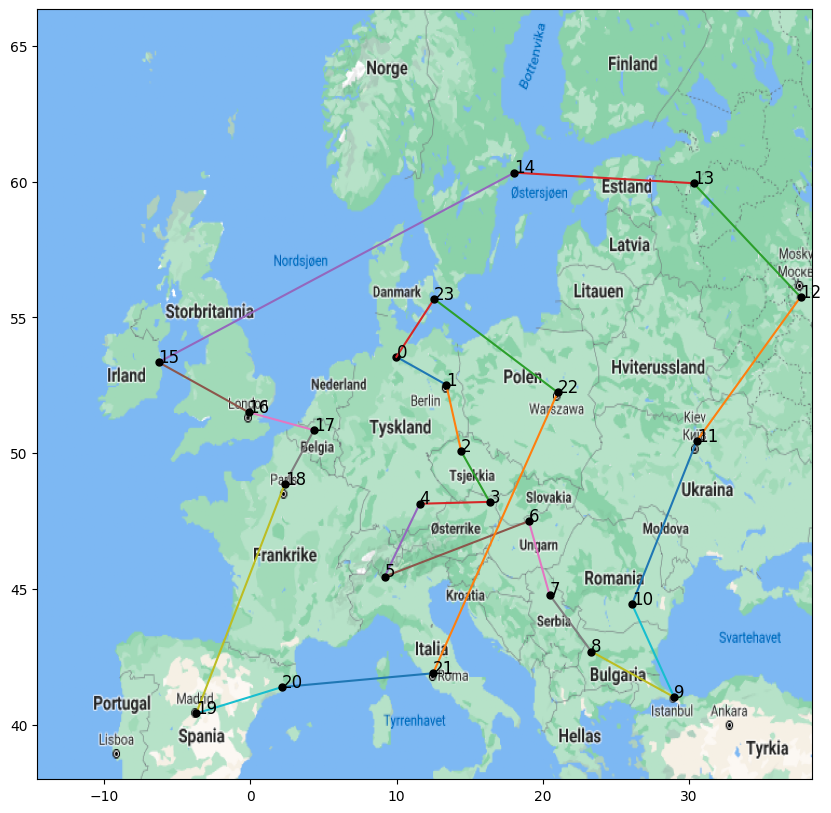


Population Size: 100
Average execution time: 0.2243 sec
Best route for 24 cities: 12421.730000000001
Worst: 14225.309999999996, Mean: 13156.088, Std Dev: 426.5544282339587


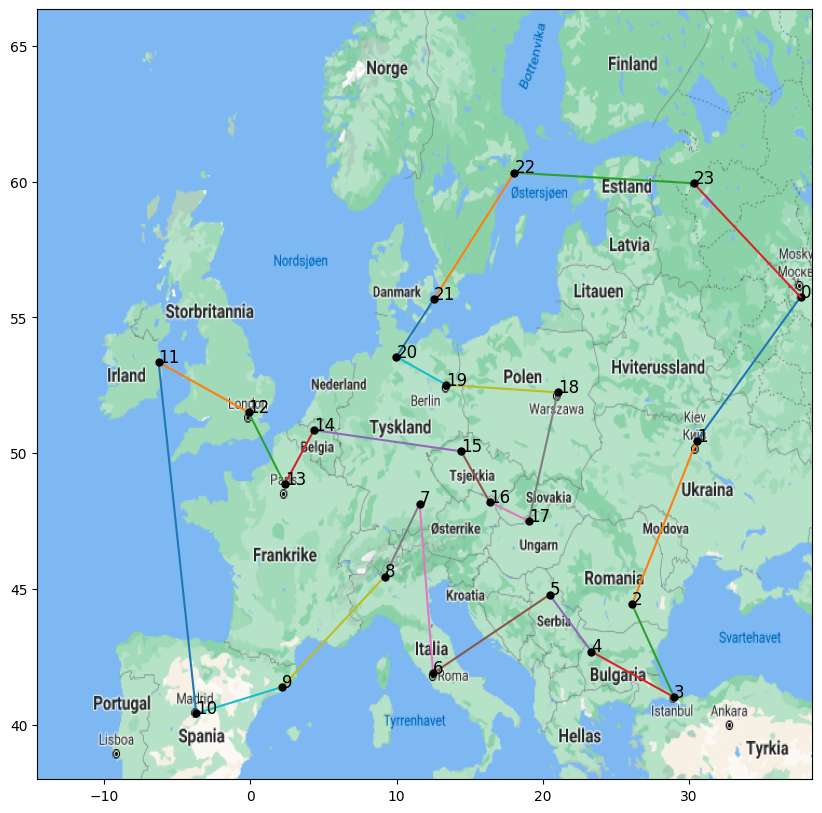

In [310]:
# Genetic Algorithm
def Genetic(n, population_size, generations, mutation_rate):
    population = makePopulation(n, population_size)
    population_fitness = evaluate_fitness(population)

    best_fitness_per_generation = []

    for _ in range(generations):
        parents = parentSelection(population_fitness, population_size // 2)

        # Crossover
        children = []
        for i in range(0, len(parents), 2):
            if i + 1 < len(parents):
                child1, child2 = crossover(parents[i], parents[i + 1])
                children.append(child1)
                children.append(child2)

        # Mutation
        for i in range(len(children)):
            if np.random.rand() < mutation_rate:
                children[i] = swap_mutation(children[i])

        # Evaluate Children
        children_fitness = evaluate_fitness(children)

        # Combine Parents and Offspring
        combined_population = population_fitness + children_fitness
        elites = survivorSelection(combined_population, population_size)

        population_fitness = elites  # Update population
        best_fitness_per_generation.append(min(population_fitness, key=lambda x: x[1])[1])

    best = sorted(population_fitness, key=lambda x: x[1])[0]  # Get best route
    return best, best_fitness_per_generation

# Analyze results (Fix the missing function)
def analyze_results(resultsGA):
    distances = [tour_dist(route[0]) for route in resultsGA]
    return min(distances), max(distances), np.mean(distances), np.std(distances)

# Running the Algorithm
mutation_rate = 0.3
runs = 20

def run_genetic_algorithm(n, population_size, generations):
    all_runs_best_fitness = np.zeros(generations)
    resultsGA = []
    total_time = 0

    for _ in range(runs):
        start_time = time.time()
        route, best_fitness_per_generation = Genetic(n, population_size, generations, mutation_rate)
        end_time = time.time()
        total_time += end_time - start_time
        resultsGA.append(route)
        all_runs_best_fitness += np.array(best_fitness_per_generation)
    
    avg_time = total_time / runs
    print(f"Average execution time: {avg_time:.4f} sec")
    
    best, worst, mean, std_dev = analyze_results(resultsGA)
    print(f"Best route for {n} cities: {best}")
    print(f"Worst: {worst}, Mean: {mean}, Std Dev: {std_dev}")

    plot_plan(resultsGA[-1][0])  # Show the best route

    avg_best_fitness = all_runs_best_fitness / runs
    return avg_best_fitness, resultsGA

# Running with Different Population Sizes
generations = 100
print("\nRunning Genetic Algorithm with Different Population Sizes")

print("\nPopulation Size: 10")
avg_fitness_10, resultsGA_10 = run_genetic_algorithm(24, 10, generations)

print("\nPopulation Size: 50")
avg_fitness_50, resultsGA_50 = run_genetic_algorithm(24, 50, generations)

print("\nPopulation Size: 100")
avg_fitness_100, resultsGA_200 = run_genetic_algorithm(24, 100, generations)



Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
# GA massively outperforms exhaustive search in runtime. Even for 10 cities, GA is orders of magnitude faster. 
# GA was much faster than exhaustive search and could compute 24-city solutions in milliseconds.
# GA came close to the shortest tour for 10 cities, but not exactly the same, but close. 

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 3)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min, max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [317]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Hybrid Lamarckian GA
def hybrid_lamarckian(cities, pop_size, generations, hc_iterations=100, mutation_rate=0.1):
    population = makePopulation(len(cities), pop_size)
    population_fitness = evaluate_fitness(population)

    best_fitness_per_generation = []

    for _ in range(generations):
        for i in range(len(population)):
            population[i], _ = hill_climbing(population[i], hc_iterations)

        fitnesses = evaluate_fitness(population)
        parents = parentSelection(fitnesses, pop_size // 2)

        children = []
        for i in range(0, len(parents), 2):
            if i + 1 < len(parents):
                child1, child2 = crossover(parents[i], parents[i + 1])
                children.append(child1)
                children.append(child2)

        for i in range(len(children)):
            if np.random.rand() < mutation_rate:
                children[i] = swap_mutation(children[i])
            children[i], _ = hill_climbing(children[i], hc_iterations)

        children_fitness = evaluate_fitness(children)
        combined_population = fitnesses + children_fitness
        elites = survivorSelection(combined_population, pop_size)

        population_fitness = elites
        best_fitness_per_generation.append(min(population_fitness, key=lambda x: x[1])[1])

    return min(population_fitness, key=lambda x: x[1])[0], best_fitness_per_generation

# Hybrid Baldwinian GA
def hybrid_baldwinian(cities, pop_size, generations, hc_iterations=100, mutation_rate=0.1):
    population = makePopulation(len(cities), pop_size)
    population_fitness = evaluate_fitness(population)

    best_fitness_per_generation = []

    for _ in range(generations):
        fitnesses = [(tour, tour_dist(hill_climbing(tour[:], hc_iterations)[0])) for tour, _ in population_fitness]
        parents = parentSelection(fitnesses, pop_size // 2)

        children = []
        for i in range(0, len(parents), 2):
            if i + 1 < len(parents):
                child1, child2 = crossover(parents[i], parents[i + 1])
                children.append(child1)
                children.append(child2)

        for i in range(len(children)):
            if np.random.rand() < mutation_rate:
                children[i] = swap_mutation(children[i])

        children_fitness = [(tour, tour_dist(hill_climbing(tour[:], hc_iterations)[0])) for tour in children]
        combined_population = fitnesses + children_fitness
        elites = survivorSelection(combined_population, pop_size)

        population_fitness = elites
        best_fitness_per_generation.append(min(population_fitness, key=lambda x: x[1])[1])

    return min(population_fitness, key=lambda x: x[1])[0], best_fitness_per_generation



In [318]:
# Run GA experiments and store fitness values directly
def run_ga_experiments(cities, pop_size, generations):
    best_pure_ga, pure_ga_fitness = Genetic(10, pop_size, generations, 0.1)
    best_lamarckian, lamarckian_fitness = hybrid_lamarckian(cities, pop_size, generations)
    best_baldwinian, baldwinian_fitness = hybrid_baldwinian(cities, pop_size, generations)

    return pure_ga_fitness, lamarckian_fitness, baldwinian_fitness

# Analyze results and print fitness statistics
def analyze_results(pure_ga_fitness, lamarckian_fitness, baldwinian_fitness):
    stats = {
        "Pure GA": {
            "Best": np.min(pure_ga_fitness),
            "Worst": np.max(pure_ga_fitness),
            "Mean": np.mean(pure_ga_fitness),
            "Std dev": np.std(pure_ga_fitness),
        },
        "Lamarckian": {
            "Best": np.min(lamarckian_fitness),
            "Worst": np.max(lamarckian_fitness),
            "Mean": np.mean(lamarckian_fitness),
            "Std dev": np.std(lamarckian_fitness),
        },
        "Baldwinian": {
            "Best": np.min(baldwinian_fitness),
            "Worst": np.max(baldwinian_fitness),
            "Mean": np.mean(baldwinian_fitness),
            "Std dev": np.std(baldwinian_fitness),
        },
    }

    for model, values in stats.items():
        print(f"{model}: Best: {values['Best']:.2f}, Worst: {values['Worst']:.2f}, "
              f"Mean: {values['Mean']:.2f}, Std dev: {values['Std dev']:.2f}")



Pure GA: Best: 7503.10, Worst: 9595.05, Mean: 7722.19, Std dev: 447.72
Lamarckian: Best: 7486.31, Worst: 7663.51, Mean: 7495.26, Std dev: 34.44
Baldwinian: Best: 7486.31, Worst: 8022.57, Mean: 7525.02, Std dev: 101.92


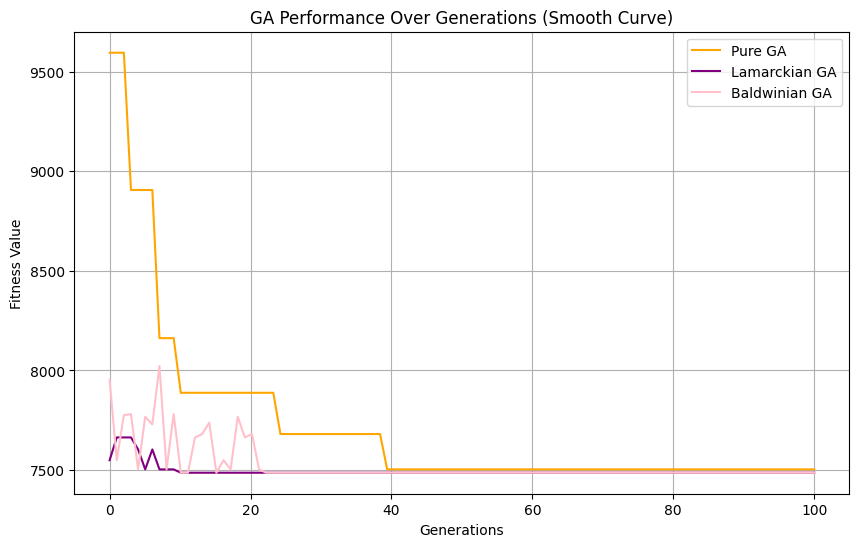

In [ ]:
# Plot GA performance with a smooth curve
def plot_ga_curve(pure_ga_fitness, lamarckian_fitness, baldwinian_fitness):
    generations = len(pure_ga_fitness)
    x = np.linspace(0, generations, generations)

    plt.figure(figsize=(10, 6))
    plt.plot(x, pure_ga_fitness, linestyle='-', color='orange', label='Pure GA')
    plt.plot(x, lamarckian_fitness, linestyle='-', color='purple', label='Lamarckian GA')
    plt.plot(x, baldwinian_fitness, linestyle='-', color='pink', label='Baldwinian GA')

    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title("GA Performance Over Generations")
    plt.legend()
    plt.grid(True)
    plt.show()

# Set parameters
pop_size = 50
num_generations = 100
cities = list(city_coords.keys())[:10]

# Run GA experiments
pure_ga_fitness, lamarckian_fitness, baldwinian_fitness = run_ga_experiments(cities, pop_size, num_generations)

# Print results
analyze_results(pure_ga_fitness, lamarckian_fitness, baldwinian_fitness)

# Plot GA performance with a curve
plot_ga_curve(pure_ga_fitness, lamarckian_fitness, baldwinian_fitness)


In [ ]:
#I know something is wrong, but i dont/did not have time to fix it, so i did my best. Skjønner ikke hvorfor lamarckian og baldwinian har de samme resultatene. Er noe med distansen som er veldig rart. 
# Har noen teorier, som jeg ikke hadde tid til å løse eller tanker på hvordan. Tror kanskje at populasjonen ikke oppdateres riktig eller at fitnessen er feil. lurer på om jeg har plottet noe feil, slet med denne oppgaven, så fikk en del hjelp på gruppe timer. 
# Skjønner at jeg skal kombinerer GA og Hill Climbing ved å bruke Hill Climbing på individer i GA-populasjonen
# Og at jeg skal forbedre GA-ytelsen ved å finjustere løsningene mer lokal, men sliter med å få ut et ønsket resultat. Prøvd å debugge 